### Factor investing and asset pricing anomalies
By Teddy Tenetcha

In [19]:
import pandas as pd

In [21]:
file_path = '/Users/teddytenetcha/Desktop/data_ml.csv'
data = pd.read_csv(file_path)
idx_date=data.index[(data['date'] > '1999-12-31') & (data['date'] < '2019-01-01')].tolist() # creating and index to retrive the dates
data_ml=data.iloc[idx_date]           # filtering the dataset according to date index
data_ml.iloc[1:6,1:6]

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd
1,13,2007-01-31,0.25,0.32,0.28
2,13,2007-02-28,0.26,0.30,0.30
3,17,2015-03-31,0.73,0.64,0.70
4,17,2015-04-30,0.72,0.62,0.66
5,17,2015-05-31,0.71,0.63,0.64


Text(0, 0.5, 'nb_assets')

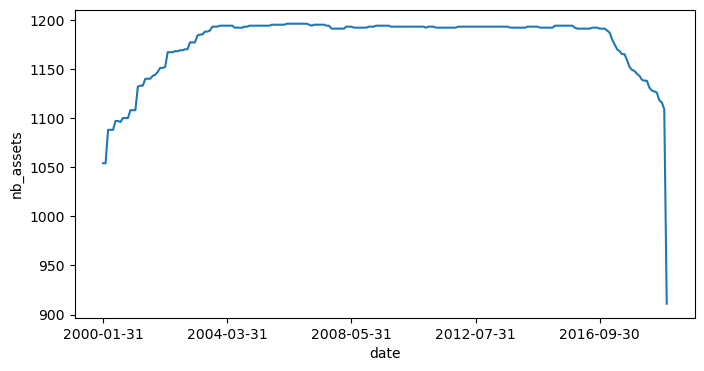

In [23]:
import matplotlib.pyplot as plt
pd.Series(data_ml.groupby('date').size()).plot(figsize=(8,4)) # counting the number of assets for each date
plt.ylabel('nb_assets')                                        # adding the ylabel and plotting 

#### In anticipation for future models, we keep the name of the predictors in memory. In addition, we also keep a much shorter list of predictors.

In [25]:
features=list(data_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)
features_short =["Div_Yld", "Eps", "Mkt_Cap_12M_Usd", "Mom_11M_Usd", 
                    "Ocf", "Pb", "Vol1Y_Usd"]

##### The predictors have been uniformized, that is, for any given feature and time point, the distribution is uniform. Given 1,207 stocks, the graph below cannot display a perfect rectangle.

Text(0, 0.5, 'count')

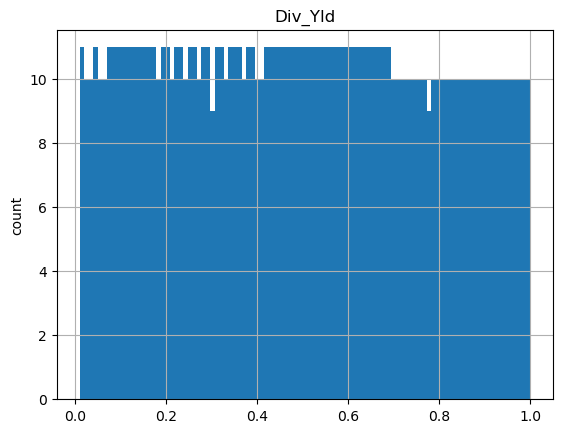

In [29]:
col_feat_Div_Yld=data_ml.columns.get_loc('Div_Yld') # finding the location of the column/feature Div_Yld
is_custom_date =data_ml['date']=='2000-02-29'       # creating a boolean index to filter on 
data_ml[is_custom_date].iloc[:,[col_feat_Div_Yld]].hist(bins=100) # using the hist 
plt.ylabel('count')

##### FIGURE 1.2: Distribution of the dividend yield feature on date 2000-02-29.

##### The original labels (future returns) are numerical and will be used for regression exercises, that is, when the objective is to predict a scalar real number. Sometimes, the exercises can be different and the purpose may be to forecast categories (also called classes), like “buy”, “hold” or “sell”. In order to be able to perform this type of classification analysis, we create additional labels that are categorical.

In [33]:
import numpy as np
import pandas as pd

# Compute medians for both labels at each date
df_median = data_ml[['date', 'R1M_Usd', 'R12M_Usd']].groupby('date').median().reset_index()
df_median.rename(columns={"R1M_Usd": "R1M_Usd_median", "R12M_Usd": "R12M_Usd_median"}, inplace=True)

# Merge the median values back to the original dataframe
df = data_ml.merge(df_median, how='left', on='date')

# Use .loc to ensure correct assignment
data_ml.loc[:, 'R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0)
data_ml.loc[:, 'R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0)

# Optional: Cleanup temporary variables
del df_median
del df


In [35]:
df_median=[]          #creating empty placeholder for temporary dataframe
df=[]                #creating empty placeholder for temporary dataframe
import numpy as np
df_median=data_ml[['date','R1M_Usd','R12M_Usd']].groupby(['date']).median() # computings medians for both labels at each date 
df_median.rename(columns={"R1M_Usd": "R1M_Usd_median", "R12M_Usd": "R12M_Usd_median"},inplace=True)
df = pd.merge(data_ml,df_median,how='left', on=['date'])             # join the dataframes
data_ml['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0) # Create the categorical labels
data_ml['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0) # Create the categorical labels
df_median=[]          #removing the temp dataframe to keep it light!
df=[]                 #removing the temp dataframe to keep it light!

/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79003/109147006.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R1M_Usd_C'] = np.where(df['R1M_Usd'] > df['R1M_Usd_median'], 1.0, 0.0) # Create the categorical labels
/var/folders/jn/tqlpvlnn0314tc816qm4vnt80000gn/T/ipykernel_79003/109147006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['R12M_Usd_C'] = np.where(df['R12M_Usd'] > df['R12M_Usd_median'], 1.0, 0.0) # Create the categorical labels


##### Note: The new labels are binary: they are equal to 1 (true) if the original return is above that of the median return over the considered period and to 0 (false) if not. Hence, at each point in time, half of the sample has a label equal to zero and the other half to one: some stocks overperform and others underperform. In machine learning, models are estimated on one portion of data (training set) and then tested on another portion of the data (testing set) to assess their quality. We split our sample accordingly.

In [37]:
separation_date = "2014-01-15"
idx_train=data_ml.index[(data_ml['date'] < separation_date)].tolist() 
idx_test=data_ml.index[(data_ml['date'] >= separation_date)].tolist() 

##### Note:  We also keep in memory a few key variables, like the list of asset identifiers and a rectangular version of returns. For simplicity, in the computation of the latter, we shrink the investment universe to keep only the stocks for which we have the maximum number of points.

In [39]:
stock_ids_short=[]   # creating empty placeholder for temporary dataframe
stock_days=[]        # creating empty placeholder for temporary dataframe
stock_ids=data_ml['stock_id'].unique() # A list of all stock_ids
stock_days=data_ml[['date','stock_id']].groupby(['stock_id']).count().reset_index() # compute the number of data points per stock
stock_ids_short=stock_days.loc[stock_days['date'] == (stock_days['date'].max())] # Stocks with full data
stock_ids_short=stock_ids_short['stock_id'].unique() ### in order to get a list 
is_stock_ids_short=data_ml['stock_id'].isin(stock_ids_short)  
returns=data_ml[is_stock_ids_short].pivot(index='date',columns='stock_id',values='R1M_Usd') # compute returns in matrix format

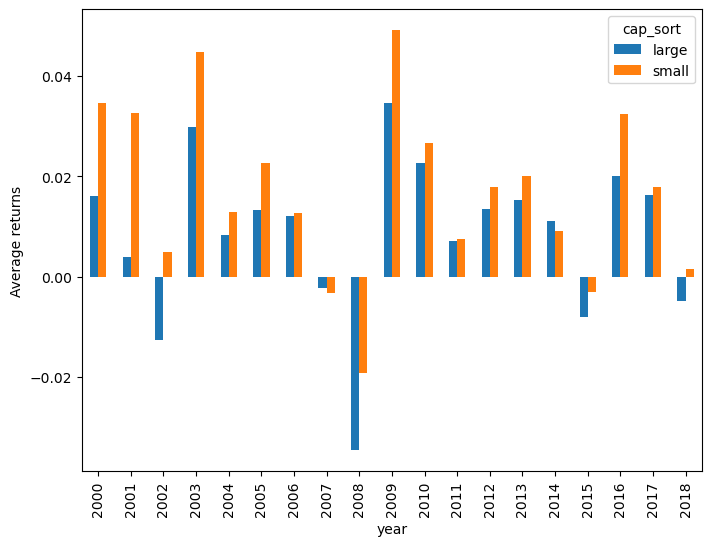

In [41]:

df_median=[]          #creating empty placeholder for temporary dataframe
df=[]       
df_median=data_ml[['date','Mkt_Cap_12M_Usd']].groupby(['date']).median().reset_index() # computing median
df_median.rename(columns = {'Mkt_Cap_12M_Usd': 'cap_median'}, inplace = True) # renaming for clarity
df = pd.merge(data_ml[["date",'Mkt_Cap_12M_Usd','R1M_Usd']],df_median,how='left', on=['date']) 
df=df.groupby([pd.to_datetime(df['date']).dt.year,np.where(df['Mkt_Cap_12M_Usd'] > df['cap_median'], 'large', 'small')])['R1M_Usd'].mean().reset_index() # groupby and defining "year" and cap logic
df.rename(columns = {'level_1': 'cap_sort'}, inplace = True) 
df.pivot(index='date',columns='cap_sort',values='R1M_Usd').plot.bar(figsize=(8,6))
plt.ylabel('Average returns')
plt.xlabel('year')    
df_median=[]          #removing the temp dataframe to keep it light!
df=[] 

In [43]:
file_path2 = '/Users/teddytenetcha/Downloads/F-F_Research_Data_5_Factors_2x3.csv'
df_ff = pd.read_csv(file_path2, header=3, sep=',', quotechar='"') 
df_ff = pd.read_csv(file_path2, skiprows=3)  # Skip first 3 rows to get correct headers
df_ff.head()


,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.41,-0.97,0.68,-1.18,0.27
1,196308,5.07,-0.80,1.80,0.36,-0.35,0.25
2,196309,-1.57,-0.52,0.13,-0.71,0.29,0.27
3,196310,2.53,-1.39,-0.10,2.80,-2.01,0.29
4,196311,-0.85,-0.88,1.75,-0.51,2.24,0.27


In [51]:
# read_data
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize

df_ff = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', 
                    header=2, index_col=0, sep=',', quotechar='"')
df_ff.rename(columns = {'Mkt-RF':'MKT_RF'}, inplace = True)
df_ff = df_ff.loc[:'202003', :]  # hardcode
df_ff = df_ff.astype("float", copy=False)
df_ff[['MKT_RF','SMB','HML','RMW','CMA','RF']] /= 100.0

# Corrected line: remove "datetime.datetime" → "datetime"
df_ff['date'] = pd.to_datetime(list(map(lambda x: datetime.strptime(x, "%Y%m"), df_ff.index)))

df_ff['date'] += pd.offsets.MonthEnd(0)  # month first -> month end

# process date for further use
df_ff['date'] = list(map(lambda x: str(x).split(" ")[0], df_ff['date']))
df_ff['year'] = pd.to_datetime(df_ff['date']).dt.year
df_ff.reset_index(drop=True, inplace=True)

min_date = '1963-07-31'
max_date = '2020-03-28'
idx_ff = (df_ff['date'] >= min_date) & (df_ff['date'] <= max_date)
FF_factors = df_ff.loc[idx_ff, :]


In [55]:
import pandas as pd

pd.concat([FF_factors.head(), FF_factors.tail()])

,MKT_RF,SMB,HML,RMW,CMA,RF,date,year
0,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027,1963-07-31,1963
1,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025,1963-08-31,1963
2,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027,1963-09-30,1963
3,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029,1963-10-31,1963
4,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027,1963-11-30,1963
675,0.0206,0.0027,-0.0190,0.0043,-0.0095,0.0016,2019-10-31,2019
676,0.0388,0.0045,-0.0199,-0.0163,-0.0125,0.0012,2019-11-30,2019
677,0.0277,0.0097,0.0178,-0.0002,0.0123,0.0014,2019-12-31,2019
678,-0.0011,-0.0440,-0.0625,-0.0120,-0.0230,0.0013,2020-01-31,2020
679,-0.0813,0.0004,-0.0380,-0.0149,-0.0252,0.0012,2020-02-29,2020


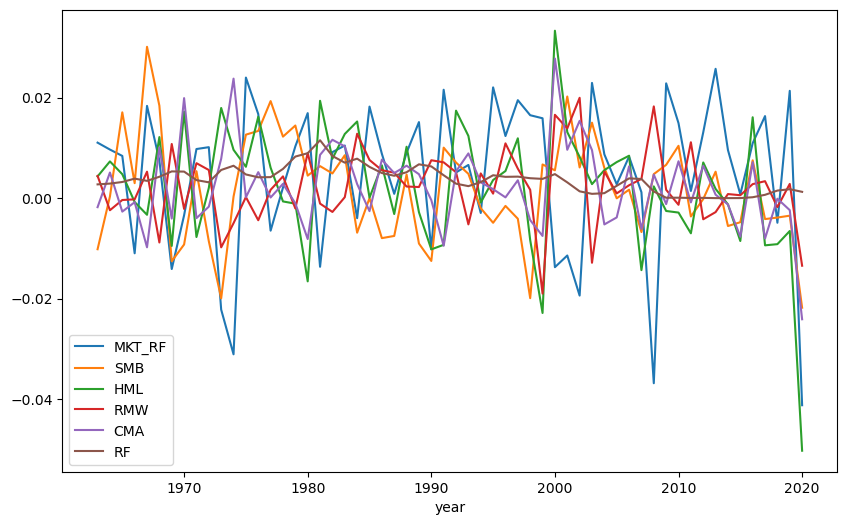

In [57]:
FF_factors.groupby(["year"])[['MKT_RF','SMB','HML','RMW','CMA','RF']].mean().plot(figsize= (10, 6))
plt.legend(loc = "best");

#### Fama-Macbeth regressions

#### Redundant factors (HML in FF5)

In [61]:
factors = ["MKT_RF", "SMB", "HML", "RMW", "CMA"]
FF_factors = FF_factors.loc[:, factors]

models = FF_factors.apply(lambda x: sm.OLS(endog=FF_factors.loc[:, FF_factors.columns == x.name],
                          exog=sm.add_constant(FF_factors.loc[:, FF_factors.columns != x.name])).fit(), 
                          axis=0)

alphas = pd.DataFrame({"const":map(lambda x: x.params["const"], models),
                        "p_value":map(lambda x: x.pvalues["const"], models)},
                       index = factors)
alphas

,const,p_value
MKT_RF,0.007797,3.694710e-07
SMB,0.002742,1.287668e-02
HML,-0.000557,4.884010e-01
RMW,0.003873,8.539579e-07
CMA,0.002397,5.820163e-06


In [69]:
stars = ['(***)','(**)','(*)','','']
df_significance = pd.DataFrame(map(lambda x: x.pvalues, models), 
                               index = factors).loc[:, ["const"] + factors]
conditions = [(df_significance > 0) & (df_significance < 0.001), 
              (df_significance > 0.001) & (df_significance < 0.01),
              (df_significance > 0.01) & (df_significance < 0.05),
              (df_significance > 0.05),
              (df_significance.isna())
             ]
df_significance = pd.DataFrame(np.select(conditions, stars).astype(str), index = factors)
df_significance.columns = ["const"] + factors
df_significance

,const,MKT_RF,SMB,HML,RMW,CMA
MKT_RF,(***),,(***),,(***),(***)
SMB,(*),(***),,,(***),
HML,,,,,(***),(***)
RMW,(***),(***),(***),(***),,(***)
CMA,(***),(***),,(***),(***),


In [71]:
df_coef = pd.DataFrame(map(lambda x: x.params, models), 
                       index = factors).loc[:, ["const"] + factors]
df_coef = round(df_coef,3).astype(str)
df_coef.apply(lambda x: x.str.cat(df_significance[x.name]),axis=0)

,const,MKT_RF,SMB,HML,RMW,CMA
MKT_RF,0.008(***),nan,0.257(***),0.12,-0.363(***),-0.945(***)
SMB,0.003(*),0.131(***),nan,0.085,-0.434(***),-0.142
HML,-0.001,0.032,0.045,nan,0.167(***),1.027(***)
RMW,0.004(***),-0.095(***),-0.224(***),0.163(***),nan,-0.315(***)
CMA,0.002(***),-0.112(***),-0.033,0.451(***),-0.142(***),nan


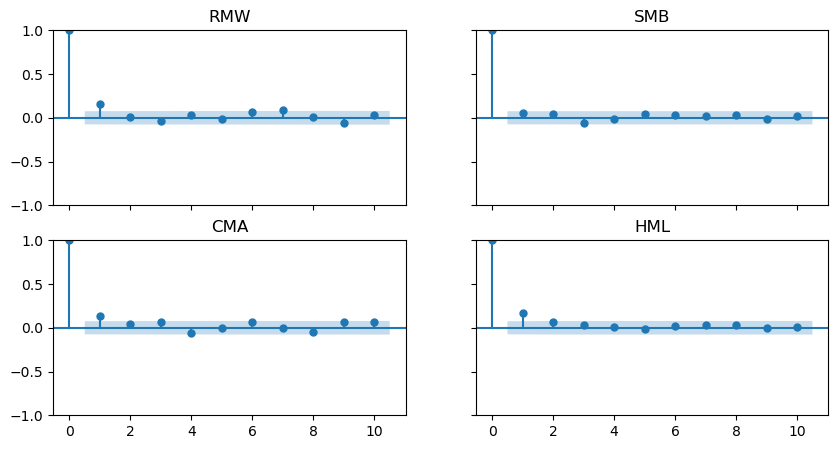

In [73]:
fig, ax = plt.subplots(2,2,figsize=(10,5),sharex='all', sharey='all')
sm.graphics.tsa.plot_acf(FF_factors[['RMW']], lags=10, ax=ax[0,0],title='RMW') 
sm.graphics.tsa.plot_acf(FF_factors[['CMA']], lags=10, ax=ax[1,0],title='CMA')
sm.graphics.tsa.plot_acf(FF_factors[['SMB']], lags=10, ax=ax[0,1],title='SMB')
sm.graphics.tsa.plot_acf(FF_factors[['HML']], lags=10, ax=ax[1,1],title='HML');

##### FIGURE 3.4: Autocorrelograms of common factor portfolios.
Of the four chosen series, only the size factor is not significantly autocorrelated at the first order.